In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing

In [11]:
california = fetch_california_housing(as_frame=True)

In [13]:
dir(california)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [15]:
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [16]:
california.data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [18]:
type(california.target)

pandas.core.series.Series

In [19]:
df, y = california.data, california.target

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [22]:
df.HouseAge = df.HouseAge.astype(int)

/var/folders/hw/7q05z4zd6h99k8hlq1ws2wtr0000gq/T/ipykernel_93618/1596275564.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.HouseAge = df.HouseAge.astype(int)


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  int64  
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 1.3 MB


In [27]:
est = sm.OLS(y, sm.add_constant(df)).fit()

In [28]:
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            MedHouseVal   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     3970.
Date:                Wed, 11 Oct 2023   Prob (F-statistic):               0.00
Time:                        12:11:55   Log-Likelihood:                -22624.
No. Observations:               20640   AIC:                         4.527e+04
Df Residuals:                   20631   BIC:                         4.534e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -36.9419      0.659    -56.067      0.000     -38.233     -35.650
MedInc         0.4367      0.004    104.054      0.000       0.428       0.445
HouseAge       0.0094      0.000     21.143      0.000       0.009       0.010
AveRooms      -0.1073      0.006    -18.235      0.000      -0.119      -0.096
AveBedrms      0.6451      0.028     22.928      0.000       0.590       0.700
Population -3.976e-06   4.75e-06     -0.837      0.402   -1.33e-05    5.33e-06
AveOccup      -0.0038      0.000     -7.769      0.000      -0.005      -0.003
Latitude      -0.4213      0.007    -58.541      0.000      -0.435      -0.407
Longitude     -0.4345      0.008    -57.682      0.000      -0.449      -0.420
==============================================================================
Omnibus:                     4393.650   Durbin-Watson:                   0.885
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14087.596
Skew:                           1.082   Prob(JB):                         0.00
Kurtosis:                       6.420   Cond. No.                     2.38e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.38e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
df = df.drop(columns=['Population'])

In [30]:
est = sm.OLS(y, sm.add_constant(df)).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            MedHouseVal   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     4538.
Date:                Wed, 11 Oct 2023   Prob (F-statistic):               0.00
Time:                        12:12:42   Log-Likelihood:                -22624.
No. Observations:               20640   AIC:                         4.526e+04
Df Residuals:                   20632   BIC:                         4.533e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -36.9175      0.658    -56.085      0.000     -38.208     -35.627
MedInc         0.4368      0.004    104.089      0.000       0.429       0.445
HouseAge       0.0096      0.000     22.602      0.000       0.009       0.010
AveRooms      -0.1071      0.006    -18.217      0.000      -0.119      -0.096
AveBedrms      0.6449      0.028     22.922      0.000       0.590       0.700
AveOccup      -0.0038      0.000     -7.861      0.000      -0.005      -0.003
Latitude      -0.4207      0.007    -58.763      0.000      -0.435      -0.407
Longitude     -0.4340      0.008    -57.782      0.000      -0.449      -0.419
==============================================================================
Omnibus:                     4406.193   Durbin-Watson:                   0.885
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14155.786
Skew:                           1.084   Prob(JB):                         0.00
Kurtosis:                       6.429   Cond. No.                     1.68e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.68e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
model = LinearRegression()
model.fit(df, y)

LinearRegression()

In [32]:
dir(model)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_set_intercept',
 '_validate_data',
 '_validate_params',
 'coef_',
 'copy_X',
 'feature_names_in_',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_features_in_',
 'n_jobs',
 'positive',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

In [41]:
model.coef_

array([ 0.43675975,  0.00955547, -0.10713406,  0.6449022 , -0.00381933,
       -0.42069942, -0.43404215])

In [34]:
model.intercept_

-36.91753711978114

In [39]:
est.params

const       -36.917537
MedInc        0.436760
HouseAge      0.009555
AveRooms     -0.107134
AveBedrms     0.644902
AveOccup     -0.003819
Latitude     -0.420699
Longitude    -0.434042
dtype: float64

In [42]:
from sklearn.preprocessing import PolynomialFeatures

In [56]:
poly = PolynomialFeatures(2)

In [57]:
poly_df = poly.fit_transform(df)

In [58]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'AveOccup', 'Latitude',
       'Longitude'],
      dtype='object')

In [59]:
df.shape, poly_df.shape

((20640, 7), (20640, 36))

In [63]:
df_square = df**2

In [65]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,AveOccup,Latitude,Longitude
0,8.3252,41,6.984127,1.023810,2.555556,37.88,-122.23
1,8.3014,21,6.238137,0.971880,2.109842,37.86,-122.22
2,7.2574,52,8.288136,1.073446,2.802260,37.85,-122.24
3,5.6431,52,5.817352,1.073059,2.547945,37.85,-122.25
4,3.8462,52,6.281853,1.081081,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...
20635,1.5603,25,5.045455,1.133333,2.560606,39.48,-121.09
20636,2.5568,18,6.114035,1.315789,3.122807,39.49,-121.21
20637,1.7000,17,5.205543,1.120092,2.325635,39.43,-121.22
20638,1.8672,18,5.329513,1.171920,2.123209,39.43,-121.32


In [64]:
df_square

,MedInc,HouseAge,AveRooms,AveBedrms,AveOccup,Latitude,Longitude
0,69.308955,1681,48.778030,1.048186,6.530864,1434.8944,14940.1729
1,68.913242,441,38.914354,0.944552,4.451433,1433.3796,14937.7284
2,52.669855,2704,68.693192,1.152287,7.852660,1432.6225,14942.6176
3,31.844578,2704,33.841580,1.151456,6.492025,1432.6225,14945.0625
4,14.793254,2704,39.461681,1.168736,4.758799,1432.6225,14945.0625
...,...,...,...,...,...,...,...
20635,2.434536,625,25.456612,1.284444,6.556703,1558.6704,14662.7881
20636,6.537226,324,37.381425,1.731302,9.751924,1559.4601,14691.8641
20637,2.890000,289,27.097675,1.254607,5.408579,1554.7249,14694.2884
20638,3.486436,324,28.403708,1.373396,4.508017,1554.7249,14718.5424


In [66]:
df_square_m = df.values**2
df_cube_m = df.values**3
df_m = df.values

In [70]:
df_cube_m.shape == df_square_m.shape == df_m.shape 

True

In [78]:
matrix_complete = np.hstack([df_m, df_square_m, df_cube_m])

In [80]:
matrix_complete.shape

(20640, 21)

In [85]:
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            MedHouseVal   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     4538.
Date:                Wed, 11 Oct 2023   Prob (F-statistic):               0.00
Time:                        12:33:25   Log-Likelihood:                -22624.
No. Observations:               20640   AIC:                         4.526e+04
Df Residuals:                   20632   BIC:                         4.533e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -36.9175      0.658    -56.085      0.000     -38.208     -35.627
MedInc         0.4368      0.004    104.089      0.000       0.429       0.445
HouseAge       0.0096      0.000     22.602      0.000       0.009       0.010
AveRooms      -0.1071      0.006    -18.217      0.000      -0.119      -0.096
AveBedrms      0.6449      0.028     22.922      0.000       0.590       0.700
AveOccup      -0.0038      0.000     -7.861      0.000      -0.005      -0.003
Latitude      -0.4207      0.007    -58.763      0.000      -0.435      -0.407
Longitude     -0.4340      0.008    -57.782      0.000      -0.449      -0.419
==============================================================================
Omnibus:                     4406.193   Durbin-Watson:                   0.885
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14155.786
Skew:                           1.084   Prob(JB):                         0.00
Kurtosis:                       6.429   Cond. No.                     1.68e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.68e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

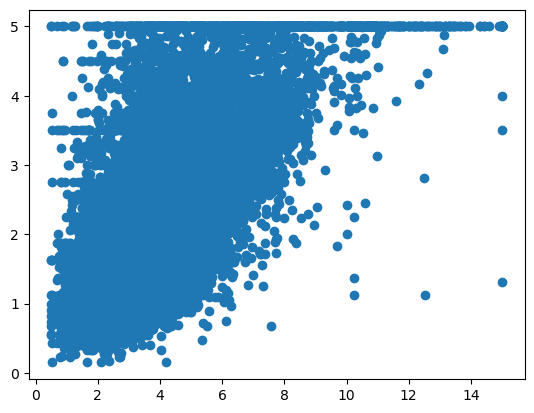

In [87]:
plt.scatter(df.MedInc, y)

In [88]:
est_wrong = sm.OLS(y, sm.add_constant(df.MedInc)).fit()

In [90]:
est_wrong.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            MedHouseVal   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                 1.856e+04
Date:                Wed, 11 Oct 2023   Prob (F-statistic):               0.00
Time:                        12:35:46   Log-Likelihood:                -25623.
No. Observations:               20640   AIC:                         5.125e+04
Df Residuals:                   20638   BIC:                         5.127e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4509      0.013     34.082      0.000       0.425       0.477
MedInc         0.4179      0.003    136.223      0.000       0.412       0.424
==============================================================================
Omnibus:                     4245.795   Durbin-Watson:                   0.655
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9273.446
Skew:                           1.191   Prob(JB):                         0.00
Kurtosis:                       5.260   Cond. No.                         10.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

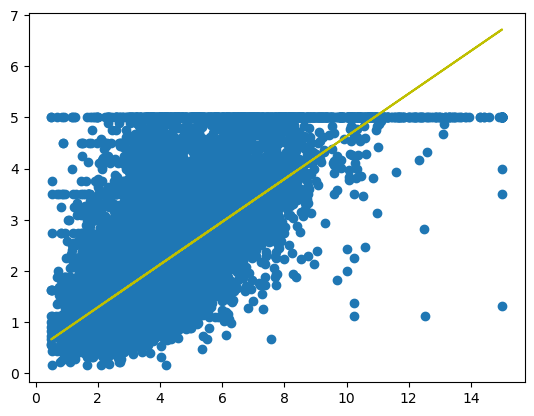

In [95]:
yhat = est_wrong.predict(sm.add_constant(df.MedInc))
plt.scatter(df.MedInc, y)
plt.plot(df.MedInc, yhat, '-y')

In [97]:
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            MedHouseVal   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     4538.
Date:                Wed, 11 Oct 2023   Prob (F-statistic):               0.00
Time:                        12:39:09   Log-Likelihood:                -22624.
No. Observations:               20640   AIC:                         4.526e+04
Df Residuals:                   20632   BIC:                         4.533e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -36.9175      0.658    -56.085      0.000     -38.208     -35.627
MedInc         0.4368      0.004    104.089      0.000       0.429       0.445
HouseAge       0.0096      0.000     22.602      0.000       0.009       0.010
AveRooms      -0.1071      0.006    -18.217      0.000      -0.119      -0.096
AveBedrms      0.6449      0.028     22.922      0.000       0.590       0.700
AveOccup      -0.0038      0.000     -7.861      0.000      -0.005      -0.003
Latitude      -0.4207      0.007    -58.763      0.000      -0.435      -0.407
Longitude     -0.4340      0.008    -57.782      0.000      -0.449      -0.419
==============================================================================
Omnibus:                     4406.193   Durbin-Watson:                   0.885
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14155.786
Skew:                           1.084   Prob(JB):                         0.00
Kurtosis:                       6.429   Cond. No.                     1.68e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.68e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [103]:
df_ = df.copy()

In [104]:
cols = df_.columns[1:]

In [105]:


for col in cols:
    df_[col] = df_[col].mean()

In [107]:
yhat_ = model.predict(df_)

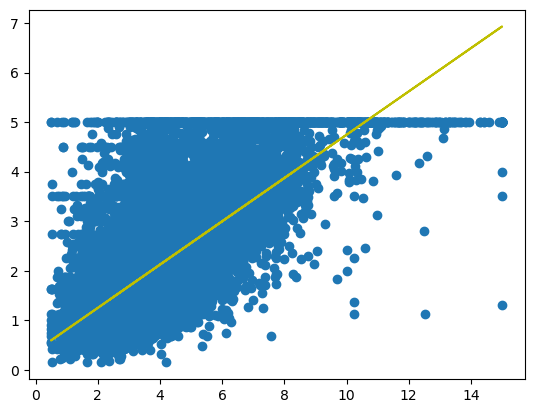

In [113]:
plt.scatter(df.MedInc, y)
plt.plot(df.MedInc, yhat_, '-y')